# Austin EV Charging Station Dataset 

###  Importing important packages and libraries


In [1]:
import numpy as np
import os
import math
from numpy import mean
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time
from numpy import nan
import googlemaps
import requests
import json
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

In [2]:
df_us = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/Plug-In_EVerywhere_Charging_Station_Network (Austin).csv')
df_us

,Station Name,Address 1,Address 2,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Subcategory,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select
0,COA FLEET - PIE / BARTON #2,505 Barton Springs Rd,NaN,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,Municipal Parking,J1772,240V,J1772,"30.256936, -97.749284",$4.17/month PIE members $2/hr Non-Members,40A
1,COA FLEET - PIE / ROOF 2,625 E 10th St,NaN,Austin,Texas,78701,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,Municipal Fleet,NEMA 5-20R,240V,J1772,"30.2696, -97.73477",$4.17/month PIE members $2/hr Non-Members,40A
2,HPI 3700 / 3900 SC 4,3900 N Capital of Texas Hwy,NaN,Austin,Texas,78746,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,General,J1772,240V,J1772,"30.337935, -97.808041",$4.17/month PIE members $2/hr Non-Members,40A
3,HPE AUSTIN / TXN04 A,14231 Tandem Blvd,NaN,Austin,Texas,78728,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,High-Tech,J1772,240V,J1772,"30.445476, -97.690074",$4.17/month PIE members $2/hr Non-Members,40A
4,NATIONAL INSTRU / 5&6,11500 N Mopac Expy,NaN,Austin,Texas,78759,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,High-Tech,J1772,240V,J1772,"30.408705, -97.725377",$4.17/month PIE members $2/hr Non-Members,40A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NATIONAL INSTRU / 3&4,11500 N Mopac Expy,NaN,Austin,Texas,78759,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,High-Tech,J1772,240V,J1772,"30.408744, -97.725343",$4.17/month PIE members $2/hr Non-Members,40A
443,PIE AE / PUBGABLESPRESS2,507 Pressler St,NaN,Austin,Texas,78703,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Parking,Commercial,J1772,240V,J1772,"30.273037, -97.759986",$4.17/month PIE members $2/hr Non-Members,40A
444,WEINSTEIN / 3 FIVE,8003 S IH 35 Frontage Rd,NaN,Austin,Texas,78744,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Multifamily Commercial,Apartment,J1772,240V,J1772,"30.172599, -97.777067",$4.17/month PIE members $2/hr Non-Members,40A
445,COA FLEET - PIE / RUTHERFORD #3,1520 Rutherford Ln,NaN,Austin,Texas,78754,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Parking,Commercial,J1772,240V,J1772,"30.337732, -97.680766",$4.17/month PIE members $2/hr Non-Members,40A


In [3]:
print("\nData size :",df_us.shape)
print("\nNumber of records :",len(df_us))
print("\nNumber of atrributes :",len(df_us.columns))
print("\nDataset Information :", df_us.info())
df_us.describe()


Data size : (447, 17)

Number of records : 447

Number of atrributes : 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              447 non-null    object
 1   Address  1                447 non-null    object
 2   Address  2                5 non-null      object
 3   City                      447 non-null    object
 4   State                     447 non-null    object
 5   Postal Code               447 non-null    int64 
 6   No. of Ports              447 non-null    int64 
 7   Pricing Policy            447 non-null    object
 8   Usage Access              447 non-null    object
 9   Category                  447 non-null    object
 10  Subcategory               440 non-null    object
 11  Port 1: Connector Type    447 non-null    object
 12  Voltage (V)               447 non-null    object
 13  Port 

,Postal Code,No. of Ports
count,447.000000,447.000000
mean,78726.581655,1.932886
std,22.624482,0.250500
min,78613.000000,1.000000
25%,78702.000000,2.000000
50%,78729.000000,2.000000
75%,78746.000000,2.000000
max,78759.000000,2.000000


In [4]:
# check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", df_us.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 459


In [5]:
# checking for null values 

null_val = pd.DataFrame({'Null Values' : df_us.isna().sum(), 
                         'Percentage Null Values' : (df_us.isna().sum()) / len(df_us) * (100)})
null_val

,Null Values,Percentage Null Values
Station Name,0,0.000000
Address 1,0,0.000000
Address 2,442,98.881432
City,0,0.000000
State,0,0.000000
Postal Code,0,0.000000
No. of Ports,0,0.000000
Pricing Policy,0,0.000000
Usage Access,0,0.000000
Category,0,0.000000


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df_us.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 2


,Postal Code,No. of Ports
0,78704,2
1,78701,2
2,78746,2
3,78728,2
4,78759,2
...,...,...
442,78759,2
443,78703,2
444,78744,2
445,78754,2


# Data Cleaning

In [7]:
df_us.columns

Index(['Station Name', 'Address  1', 'Address  2', 'City', 'State',
       'Postal Code', 'No. of Ports', 'Pricing Policy', 'Usage Access',
       'Category', 'Subcategory', 'Port 1: Connector Type', 'Voltage (V)',
       'Port 2: Connector Type', 'New Georeferenced Column', 'Pricing ',
       'Power Select'],
      dtype='object')

In [8]:
newdf_us = df_us.copy()

In [9]:
# Dropping 'Address 2' column
newdf_us = newdf_us.drop(['Address  2'], axis = 1)

In [10]:
# Dropping 'Address 2' column
newdf_us = newdf_us.drop(['Subcategory'], axis = 1)

In [11]:
#Filling NaN values in "Device name" column with most frequent column values
# defining the imputer
imputer = SimpleImputer(missing_values=nan, strategy='most_frequent')
 
# transform the dataset
newdf_us['Power Select'] = imputer.fit_transform(newdf_us['Power Select'].values.reshape(-1,1))[:,0]

In [12]:
#Checking the null values again
new_null_val = pd.DataFrame({'Null Values' : newdf_us.isna().sum(), 
                             'Percentage Null Values' : (newdf_us.isna().sum()) / len(newdf_us) * (100)})
new_null_val

,Null Values,Percentage Null Values
Station Name,0,0.0
Address 1,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
No. of Ports,0,0.0
Pricing Policy,0,0.0
Usage Access,0,0.0
Category,0,0.0
Port 1: Connector Type,0,0.0


In [13]:
#Checking the info of our dataset again
newdf_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              447 non-null    object
 1   Address  1                447 non-null    object
 2   City                      447 non-null    object
 3   State                     447 non-null    object
 4   Postal Code               447 non-null    int64 
 5   No. of Ports              447 non-null    int64 
 6   Pricing Policy            447 non-null    object
 7   Usage Access              447 non-null    object
 8   Category                  447 non-null    object
 9   Port 1: Connector Type    447 non-null    object
 10  Voltage (V)               447 non-null    object
 11  Port 2: Connector Type    447 non-null    object
 12  New Georeferenced Column  447 non-null    object
 13  Pricing                   447 non-null    object
 14  Power Select              

In [14]:
#Saving the Cleaned wifi_data to a CSV file
newdf_us.to_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/cleaned_austinev_data.csv')
print('cleaned Austin EV dataset has been saved sccessfully')

cleaned Austin EV dataset has been saved sccessfully


In [29]:
newdf_us1 = newdf_us.copy()

In [30]:
newdf_us1

,Station Name,Address 1,City,State,Postal Code,No. of Ports,Pricing Policy,Usage Access,Category,Port 1: Connector Type,Voltage (V),Port 2: Connector Type,New Georeferenced Column,Pricing,Power Select
0,COA FLEET - PIE / BARTON #2,505 Barton Springs Rd,Austin,Texas,78704,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,J1772,240V,J1772,"30.256936, -97.749284",$4.17/month PIE members $2/hr Non-Members,40A
1,COA FLEET - PIE / ROOF 2,625 E 10th St,Austin,Texas,78701,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Municipal,NEMA 5-20R,240V,J1772,"30.2696, -97.73477",$4.17/month PIE members $2/hr Non-Members,40A
2,HPI 3700 / 3900 SC 4,3900 N Capital of Texas Hwy,Austin,Texas,78746,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,240V,J1772,"30.337935, -97.808041",$4.17/month PIE members $2/hr Non-Members,40A
3,HPE AUSTIN / TXN04 A,14231 Tandem Blvd,Austin,Texas,78728,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,240V,J1772,"30.445476, -97.690074",$4.17/month PIE members $2/hr Non-Members,40A
4,NATIONAL INSTRU / 5&6,11500 N Mopac Expy,Austin,Texas,78759,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,240V,J1772,"30.408705, -97.725377",$4.17/month PIE members $2/hr Non-Members,40A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,NATIONAL INSTRU / 3&4,11500 N Mopac Expy,Austin,Texas,78759,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Workplace,J1772,240V,J1772,"30.408744, -97.725343",$4.17/month PIE members $2/hr Non-Members,40A
443,PIE AE / PUBGABLESPRESS2,507 Pressler St,Austin,Texas,78703,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Parking,J1772,240V,J1772,"30.273037, -97.759986",$4.17/month PIE members $2/hr Non-Members,40A
444,WEINSTEIN / 3 FIVE,8003 S IH 35 Frontage Rd,Austin,Texas,78744,2,$4.17/month PIE members $2/hr Non-Members,Commercial with unrestricted access,Multifamily Commercial,J1772,240V,J1772,"30.172599, -97.777067",$4.17/month PIE members $2/hr Non-Members,40A
445,COA FLEET - PIE / RUTHERFORD #3,1520 Rutherford Ln,Austin,Texas,78754,2,$4.17/month PIE members $2/hr Non-Members,Commercial with restricted access,Parking,J1772,240V,J1772,"30.337732, -97.680766",$4.17/month PIE members $2/hr Non-Members,40A


In [31]:
# To get the Continous and Categorical Variable
numcol_data = list(newdf_us1._get_numeric_data().columns)
catcol_data = list(set(newdf_us1.columns) - set(numcol_data))
print("Continous Variables:", numcol_data,"\nCategorical Variables:", catcol_data)

Continous Variables: ['Postal Code', 'No. of Ports'] 
Categorical Variables: ['Station Name', 'Port 2: Connector Type', 'Port 1: Connector Type', 'City', 'Address  1', 'Power Select', 'Pricing ', 'Usage Access', 'Category', 'State', 'Voltage (V)', 'New Georeferenced Column', 'Pricing Policy']


Usage Access ['Commercial with unrestricted access', 'Commercial with restricted access', 'Multi-family residential', 'Public (Municipal, as in library, street, etc)'] [281, 67, 57, 42]
Category ['Workplace', 'Parking', 'Multifamily Commercial', 'Municipal', 'Education', 'Healthcare', 'Retail', 'Parks and Recreation', 'Hospitality'] [166, 106, 91, 40, 14, 10, 8, 7, 5]
Port 1: Connector Type ['J1772', 'NEMA 5-20R'] [413, 34]
Voltage (V) ['240V', '--'] [417, 30]
Port 2: Connector Type ['J1772', '--'] [417, 30]


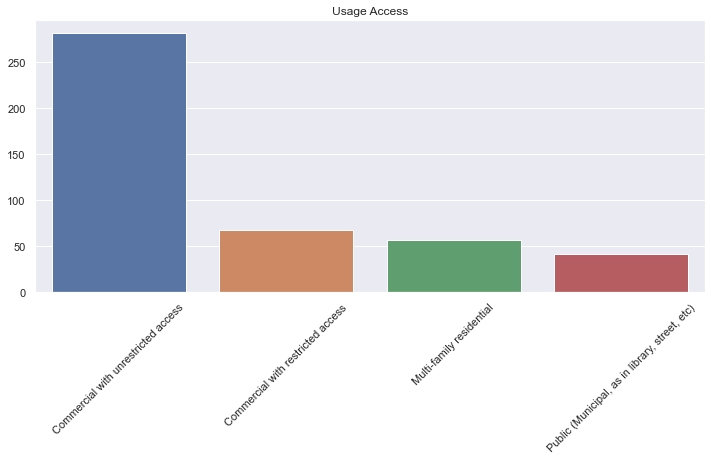

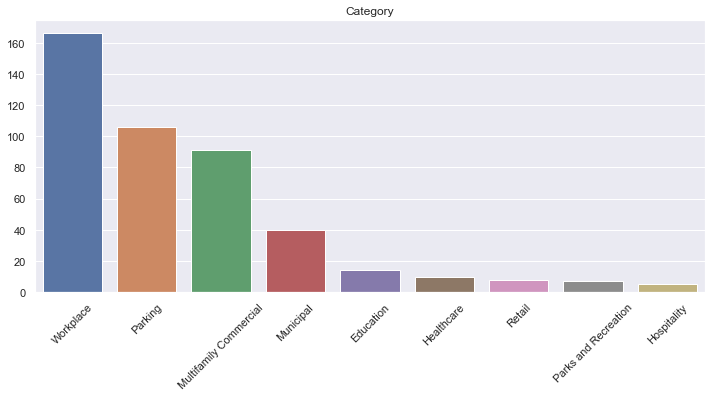

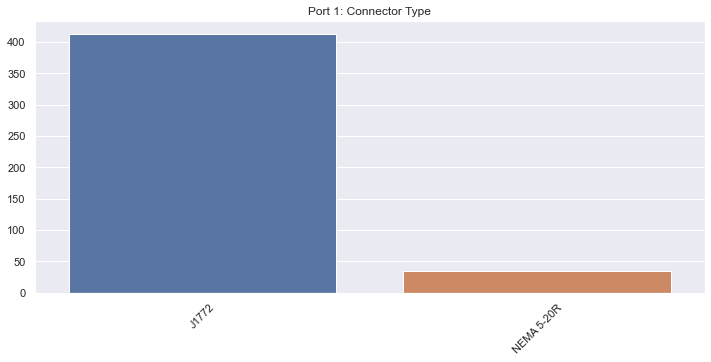

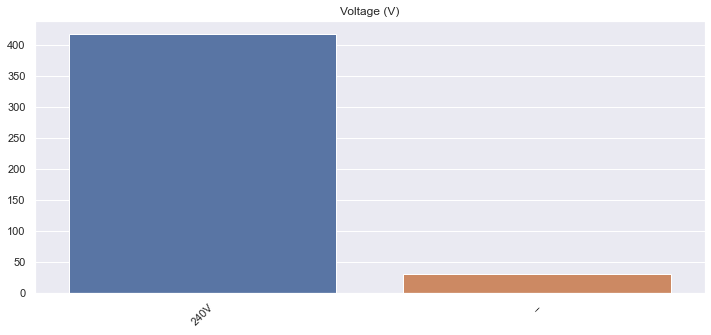

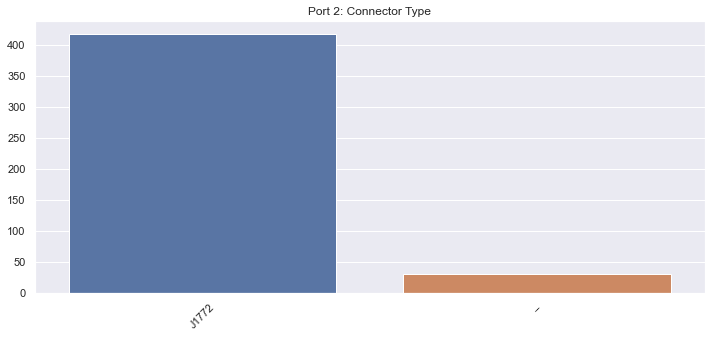

In [32]:
for a in newdf_us1.columns[7:12]:
    data = newdf_us1[a].value_counts()
    values = newdf_us1[a].value_counts().index.to_list()
    counts = newdf_us1[a].value_counts().to_list()
    
    plt.figure(figsize=(12,5))
    ax = sns.barplot(x = values, y = counts)
    
    plt.title(a)
    plt.xticks(rotation=45)
    print(a, values, counts)

### Usage Access Analysis

In [33]:
from collections import Counter

c = Counter(newdf_us1['Usage Access'])
print(c)

Counter({'Commercial with unrestricted access': 281, 'Commercial with restricted access': 67, 'Multi-family residential': 57, 'Public (Municipal, as in library, street, etc)': 42})


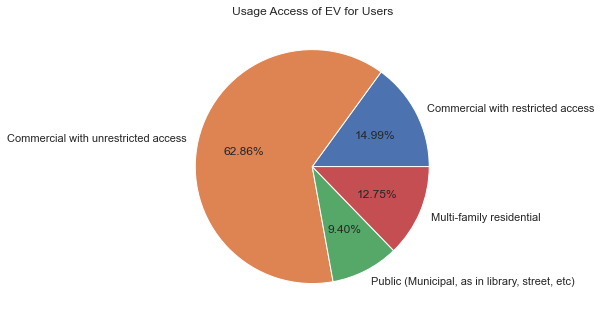

In [35]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct="%.2f%%")
plt.title('Usage Access of EV for Users') 
plt.tight_layout()

In [37]:
from collections import Counter

d = Counter(newdf_us1['Category'])
print(d)

Counter({'Workplace': 166, 'Parking': 106, 'Multifamily Commercial': 91, 'Municipal': 40, 'Education': 14, 'Healthcare': 10, 'Retail': 8, 'Parks and Recreation': 7, 'Hospitality': 5})


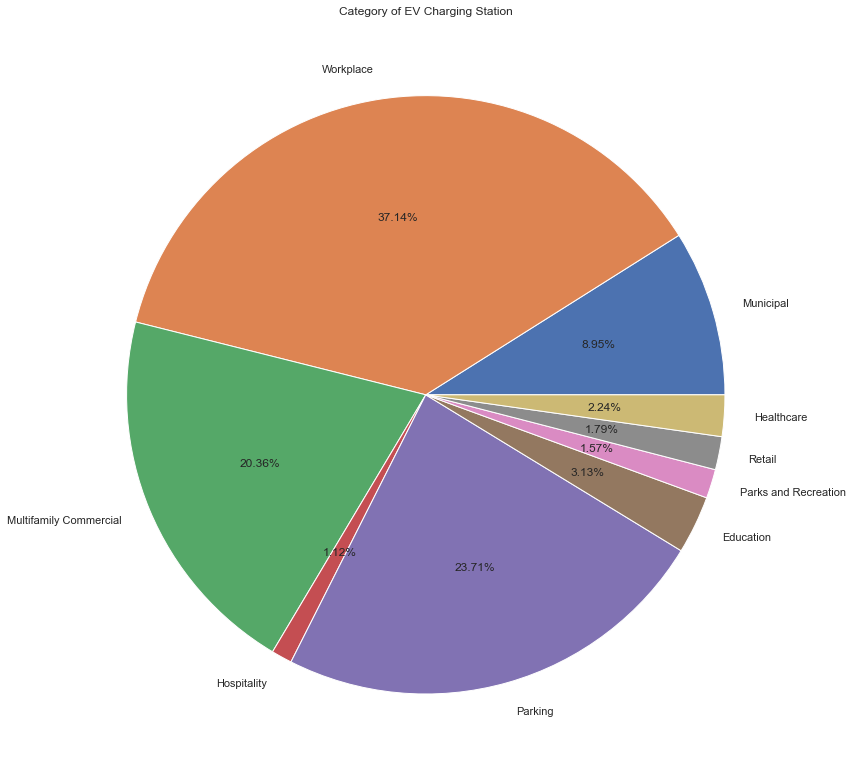

In [39]:
fig = plt.figure(figsize=(12,12))
plt.pie([float(d[v]) for v in d], labels=[str(k) for k in d], autopct="%.2f%%")
plt.title('Category of EV Charging Station') 
plt.tight_layout()

In [40]:
from collections import Counter

f = Counter(newdf_us1['Port 1: Connector Type'])
print(f)

Counter({'J1772': 413, 'NEMA 5-20R': 34})


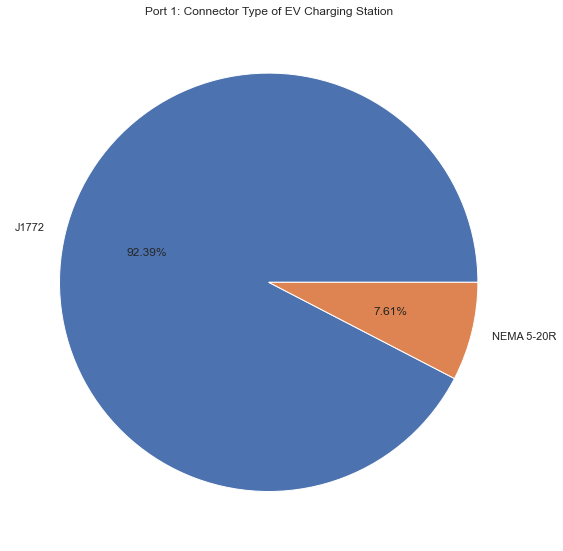

In [41]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(f[v]) for v in f], labels=[str(k) for k in f], autopct="%.2f%%")
plt.title('Port 1: Connector Type of EV Charging Station') 
plt.tight_layout()

In [50]:
newdf_us1['Voltage (V)'] = newdf_us1['Voltage (V)'].replace(['--'],'others')

In [51]:
newdf_us1['Voltage (V)'].value_counts()

240V      417
others     30
Name: Voltage (V), dtype: int64

In [52]:
newdf_us1['Port 2: Connector Type'] = newdf_us1['Port 2: Connector Type'].replace(['--'],'others')

In [53]:
newdf_us1['Port 2: Connector Type'].value_counts()

J1772     417
others     30
Name: Port 2: Connector Type, dtype: int64

In [54]:
from collections import Counter

g = Counter(newdf_us1['Port 2: Connector Type'])
print(g)

Counter({'J1772': 417, 'others': 30})


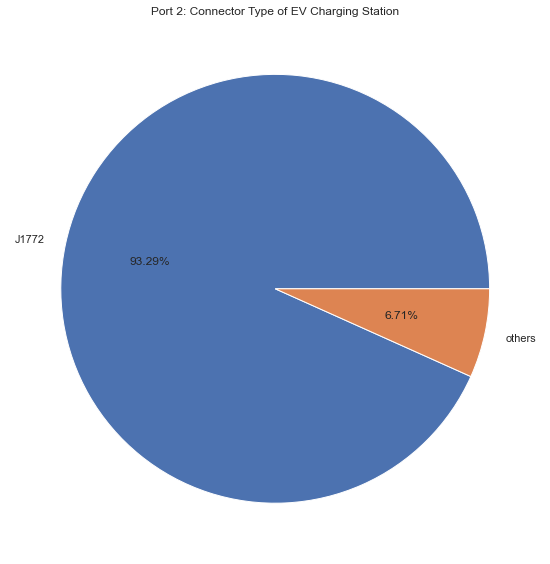

In [55]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(g[v]) for v in g], labels=[str(k) for k in g], autopct="%.2f%%")
plt.title('Port 2: Connector Type of EV Charging Station') 
plt.tight_layout()

In [57]:
newdf_us1['No. of Ports'].value_counts()

2    417
1     30
Name: No. of Ports, dtype: int64